# Задание 4

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

## Задача 1

### Задача 1.1. 
Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Задача 1.2
Изучите стоимости недвижимости

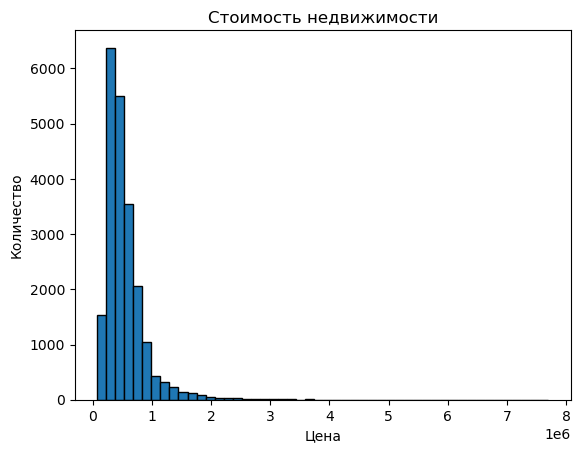

In [15]:
plt.hist(df['price'], bins= 50, edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости');

### Задача 1.3
Изучите распределение квадратуры жилой

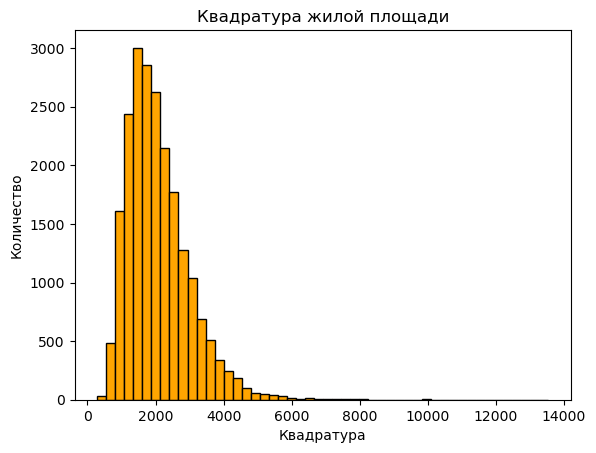

In [16]:
plt.hist(df['sqft_living'], bins= 50, color = 'orange', edgecolor='black')
plt.xlabel('Квадратура')
plt.ylabel('Количество')
plt.title('Квадратура жилой площади');

### Задача 1.4
Изучите распределение года постройки

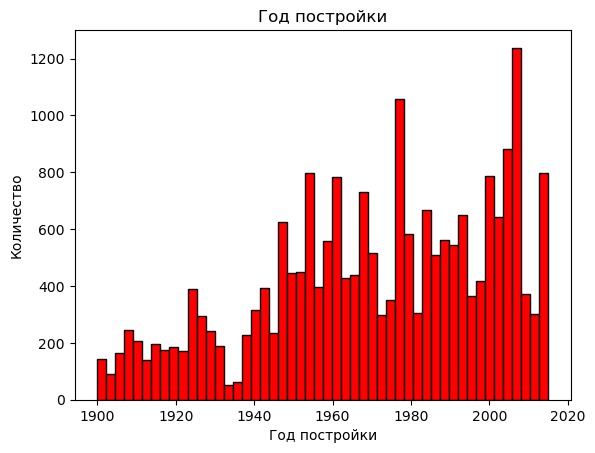

In [17]:
plt.hist(df['yr_built'], bins= 50, color = 'red', edgecolor='black')
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Год постройки');

## Задача 2

### Задача 2.1
Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

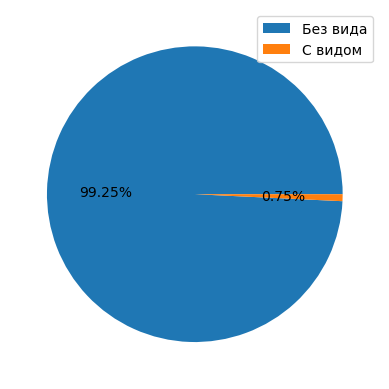

In [25]:
data_waterfront = df['waterfront'].value_counts()
plt.pie(data_waterfront.values, autopct='%1.2f%%')
plt.legend(('Без вида','С видом'));

**Вывод:** Вид на набережнею имеют всего _0.75%_ домов

### Задача 2.2
Изучите распределение этажей домов

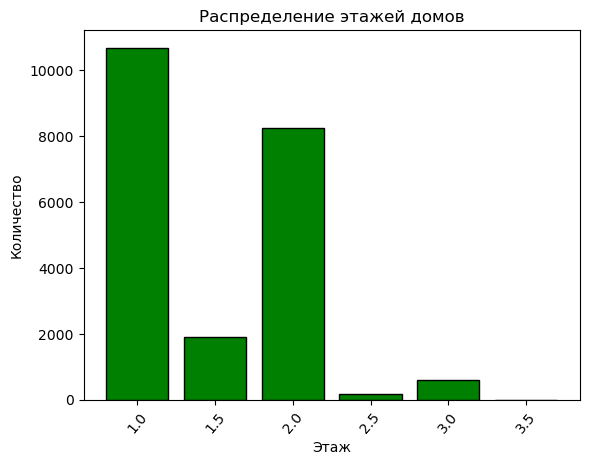

In [28]:
data_floor = df['floors'].value_counts()
plt.bar(data_floor.index, data_floor.values, color = 'green', edgecolor = 'black', width=0.4)
plt.xlabel('Этаж')
plt.ylabel('Количество')
plt.title('Распределение этажей домов');
plt.xticks(rotation=50);

**Вывод:** Большинство домов имеют 1 или 2 этажа

### Задача 2.3
Изучите распределение состояния домов

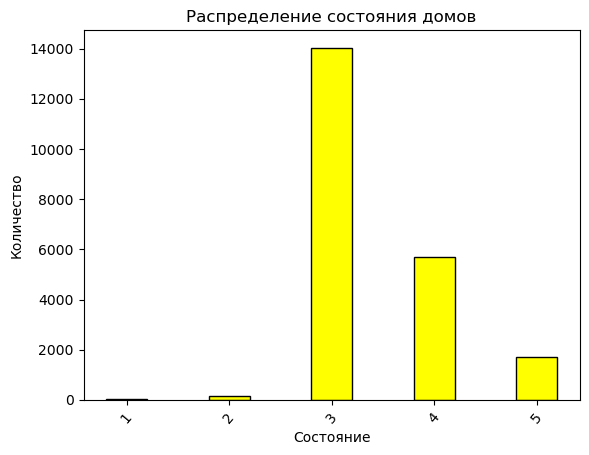

In [33]:
data_condition = df['condition'].value_counts()
plt.bar(data_condition.index, data_condition.values, color = 'yellow', edgecolor = 'black', width=0.4)
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.title('Распределение состояния домов');
plt.xticks(rotation=50);

**Вывод:** Большинство домов находятся в удовлетворительном состоянии.

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

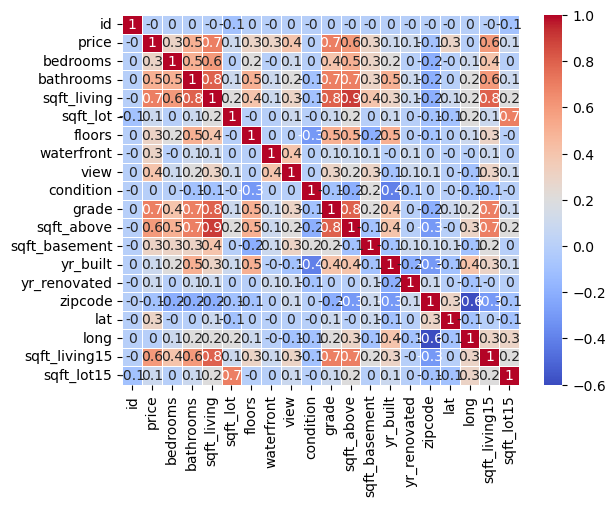

In [36]:
import numpy as np
import seaborn as sns

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Наиболее значимое влияние на цену оказывают показатели жилой площади (0.7),  количество ванных (bathrooms)(0.6), класс дома (0.7), площадь этажей (0.6) и площадь детских комнат (0.6)

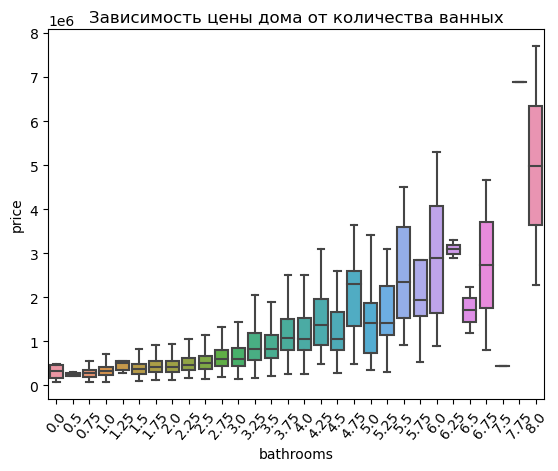

In [40]:
sns.boxplot(x=df['bathrooms'], y=df['price'], showfliers=False)
plt.title('Зависимость цены дома от количества ванных')
plt.xticks(rotation=50);

Hаблюдается зависимость роста цены на дом с ростом количества ванных

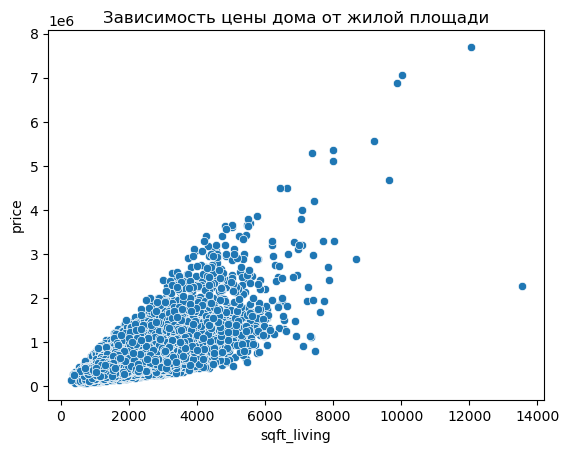

In [41]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('Зависимость цены дома от жилой площади');

Цена дома зависит от жилой площади

Text(0.5, 1.0, 'Цена относительно вида на море')

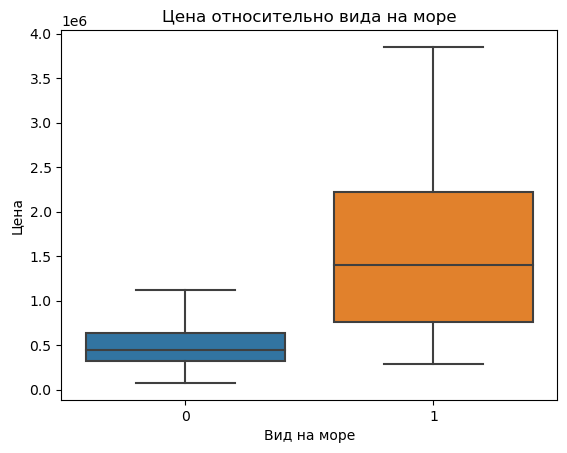

In [44]:
plt.figure()
sns.boxplot(x=df['waterfront'], y= df['price'], showfliers=False)
plt.xlabel('Вид на море')
plt.ylabel('Цена')
plt.title('Цена относительно вида на море')

Дома с видом на море стоят дороже

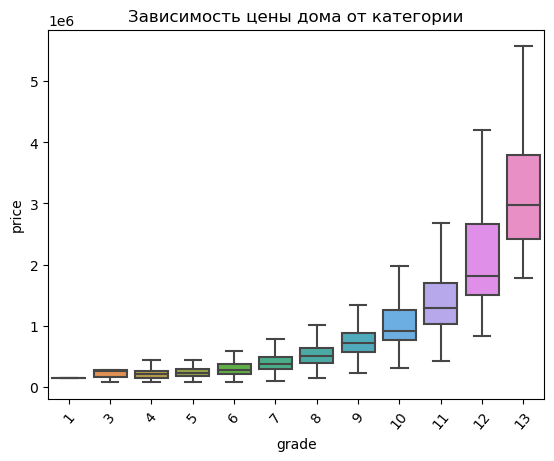

In [49]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False)
plt.title('Зависимость цены дома от категории')
plt.xticks(rotation=50);

Цена дома зависит от его категории (линейно)

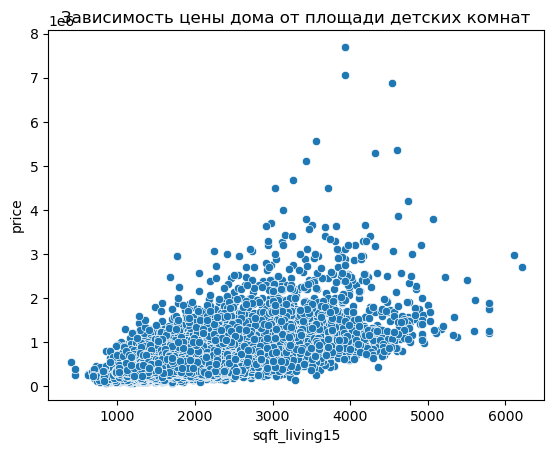

In [50]:
sns.scatterplot(x=df['sqft_living15'], y=df['price'])
plt.title('Зависимость цены дома от площади детских комнат');

Цена дома зависит и от площади детских комнат